# ODE : Initial Value Problems

Here we will study the numerical solution of ordinary differential equations with initial conditions specified.  We will only use the function `scipy.integrate.solve_ivp` for this purpose.  It is a general purpose solver with many options, only some of which we will explore.

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integ
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Documentation

We have already seen the documentation for `scipy.integrate` when we studied numerical integration.  Solving a system of differential equations is very much like numerical integration, in fact, we often say that we "integrate" the differential equations.

There are two main functions that are typically used within `scipy.integrate`: `solve_ivp`, the one we will use, and `odeint`, which appears in the "Old API" section.  In the past I have used `odeint`, you will find much code "in the wild" that uses it.  Thus, it would be good to be aware of its existence and to understand a little about it.  Regardless, we are only going to use `solve_ivp`, since, as the documentation for `odeint` states, all new code should use `solve_ivp`.

## `odeint` versus `solve_ivp`

Before looking at documentation let us briefly discuss the difference between these two functions. This is an aside, mostly with information for your edification.

When you look at the documentation for `scipy.integrate` you find an *Old API* section which contains `odeint`.  This is the interface that was used to solve initial value problems for years.  It has since been replaced by a more modern (and powerful) interface in `solve_ivp`. 

The two functions are similar in concept, but almost every choice that could be made differently between the two has been!  This means that these two are **not compatible**.  You cannot just switch between the two.  The way these functions are called, they way they call the function we provide for defining our system of differential equations, the defaults, ..., pretty much everything is different between the two!  I will leave it to you to explore all of the differences.  The ones that are of most importance to us are as follows.
1. `odeint` defaults to a "generic" solver that tries to guess the best method to use. `solve_ivp` defaults to a solver that works in many cases, but may not be optimal for all problems.
2. `odeint` has default tolerances of `1.49012e-8` for both absolute and relative tolerances. `solve_ivp` defaults to `rtol=1e-3` and `atol=1e-6`.  We will probably want to change these.
3. `odeint` requires an array of times at which to evaluate the solution to the differential equations, this information is used when solving the system. `solve_ivp` only requires the start and stop times for the solution, it will determine the points in-between as needed to achieve the desired accuracies. An array of times *can* be passed in, but is not required.
4. `odeint` accepts the `args=()` keyword option for passing extra arguments to the function we provide which defines the system of differential equations being solved. `solve_ivp` **does not** accept this keyword argument and does not provide an alternative mechanism for passing in extra arguments, thus we are going to have to find another way to achieve the same effect.

I do not like/agree with/understand all the choices made in defining `solve_ivp` (particular the lack of `args=()`) but it is what we have and what we will work with.

Finally, `solve_ivp` gives us much more control over what the solver is doing.  One example of this is the `events` keyword.  This is a feature of many modern solvers in many numerical packages.  There is enough to learn without adding in the extra flexibility (and thus complication) so we will not use it, even though it could be used in many of the problems we will be solving.

## `solve_ivp`

Finally we are ready to check the documentation for `solve_ivp`.

In [4]:
integ.solve_ivp?

The most difficult part in using `solve_ivp` is to understand how to specify the differential equations and initial conditions.  Recall that `solve_ivp` solves a system of *first order* differential equations with initial values specified.  This encompasses a large class of problems we encounter in physics.

In its simplest form we can call this functions as
```
integ.solve_ivp(func, (tmin,tmax), y0)
```
Here `func` is a function that encodes the system of first order differential equations to be solved, `(tmin,tmax)` is the range of times over which we want to solve the system of first order differential equations, and `y0` is an array of initial conditions.

### A simple example: a trigonometric function

As a first, simple case, let us consider the differential equation

$$
\frac{dy}{dt} = \cos(t)
$$

We must first define a function to pass to pass to `solve_ivp`, although we will look at another way to accomplish this in the homework. Below we do so, and pass the function to `solve_ivp`. We ask for a solution in the range $[0, 1]$ and for an initial value of $y = 0$.

In [5]:
def A(t, y) :
    return np.cos(np.deg2rad(t))

sol = integ.solve_ivp( A, (0, 3*360), np.array([0.]),
                       vectorized=True, rtol=1.0e-6, atol=1.0e-6)

What did we just do and what did we get in return?

Recall that `solve_ivp` requires a few arguments and that there are others we may want to pass in.  In this case we should notice the following.
1. The first argument to `solve_ivp` is a function that accepts `t` and `y` and returns the values of the derivatives for these inputs.
2. The second argument to `solve_ivp` are the initial and final times over which we will solve the differential equations.  Here I chose that covers several periods.
3. The third argument to `solve_ivp` are the initial conditions stored in the array `y0`.
4. The rest of the arguments are optional.  I have chosen to tell `solve_ivp` that our function is vectorized.  This means that if an array of times along with a two-dimensional array of `y` values are passed in, the function will calculate all the derivative for all the times, at once.  We will frequently write functions that are vectorized without even trying to (but not always, for example in the lab we may not) and in principle `solve_ivp` can be more efficient if it has a vectorized function.
5. I also chose to make the tolerances much smaller so that we will (hopefully) get more accurate results.
6. You will also notice that I **did not** specify at what times to calculate the solutions.  This could have been done by passing in an array of times using the `t_eval` keyword.

The results are stored in the return value from `solve_ivp`, what I have called `sol`.  Let us see what it is and what it contains.

In [6]:
print(type(sol))

# The type is not very instructive, it is some object defined
# specifically to return information from `solve_ivp`.  We can
# get information about it in the usual ways,
sol?

# As we see, this is essentially a dictionary, so we can access
# its information in standard Python ways.
sol.keys()

<class 'scipy.integrate._ivp.ivp.OdeResult'>


dict_keys(['t', 'y', 'sol', 't_events', 'nfev', 'njev', 'nlu', 'status', 'message', 'success'])

The `t` and `y` attributes will be most relevant for us here.

In [7]:
print("t =", sol.t)
print("y =", sol.y)

t = [0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 1.11110000e+00 1.11111000e+01 3.45339408e+01
 6.38135712e+01 9.84217462e+01 1.33579884e+02 1.64272230e+02
 1.89210777e+02 2.14149324e+02 2.43328361e+02 2.77839622e+02
 3.13182518e+02 3.43930322e+02 3.68966166e+02 3.94002009e+02
 4.23151192e+02 4.57626849e+02 4.93036828e+02 5.23804907e+02
 5.48876052e+02 5.73947197e+02 6.03085281e+02 6.37547715e+02
 6.72982600e+02 7.03758215e+02 7.28842445e+02 7.53926675e+02
 7.83060608e+02 8.17518098e+02 8.52962301e+02 8.83740739e+02
 9.08829864e+02 9.33918988e+02 9.63051364e+02 9.97507001e+02
 1.03295469e+03 1.06373419e+03 1.08000000e+03]
y = [[ 0.00000000e+00  1.00000000e-04  1.10000000e-03  1.10999999e-02
   1.11099930e-01  1.11103036e+00  1.10415883e+01  3.24806527e+01
   5.14151090e+01  5.66779536e+01  4.15058713e+01  1.55310072e+01
  -9.17114390e+00 -3.21630682e+01 -5.11991363e+01 -5.67602720e+01
  -4.17787890e+01 -1.58598242e+01  8.92961521e+00  3.20410592e+01
   5.

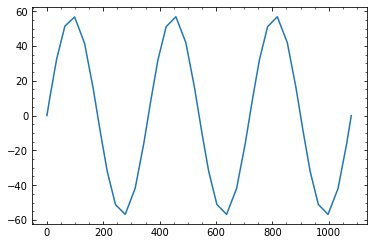

In [8]:
plt.plot(sol.t, sol.y[0])

## Physical Pendulum

Here we will look at a differential equation describing a physical pendulum.  From Newtonian mechanics for a pendulum oscillating in a plane of length $\ell$ in the presence of a constant gravitational field, $g$, the equation of motion is given by

$$
\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} = -\frac{g}{\ell} \sin\theta \equiv -\omega_0^2 \sin\theta.
$$

For convenience and for generality it is best to define $\omega_0\equiv\sqrt{g/\ell}$.

To solve this differential equation with `solve_ivp` we first need to turn it into a system of first order differential equations.  In this case, it is straight forward.  If we *define* $\omega\equiv\dot\theta$, then the system of first order differential equations is given by

\begin{align}
\frac{\mathrm{d}\theta}{\mathrm{d}t} &= \omega, \\
\frac{\mathrm{d}\omega}{\mathrm{d}t} &= -\omega_0^2 \sin\theta.
\end{align}

To fully specify a physical configuration we need to supply initial conditions at time $t=0$, that is, $\theta(0)$ and $\omega(0)$.

### Function Definition

We can now define a function to pass to `solve_ivp` that contains this system of differential equations.  We will choose $\omega_0$ specifically in this function, and discuss later how to pass this in a more convenient way.

In [10]:
def pendulum_eom (t, y) :
    """
    Choose order for y
    y[0] = theta (radians)
    y[1] = omega (radians per time)
    """
    omega0 = 2.0*np.pi
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = -omega0**2 * np.sin(y[0])
    return dydt

### Test Case: Small Amplitude Oscillations

For small amplitude oscillations we know solution to the equation of motion for the pendulum.  As always, when studying something new and when implementing something for the first time, it is best to begin with a simple test case with a known solution.

To begin, if we start with the pendulum at rest with some initial amplitude, $\theta_0$, then our initial conditions are $\theta(0)=\theta_0$ and $\omega(0)=0$.  In this case, when $\theta_0\ll 1$ we know that

$$ \theta(t) = \theta_0 \cos(\omega_0 t), \quad \omega(t) = -\theta_0\omega_0 \sin(\omega_0 t), $$

and the period of oscillations is

$$ T = \frac{2\pi}{\omega_0}. $$

As a very simple case, when we choose $\omega_0=2\pi$ per second, then $T=1$ second.  Let us see how to solve the differential equation and verify the results.

With every thing set up we can now just use `solve_ivp` to find the desired solution.

In [11]:
# Initial conditions in the same order as used for pendulum_eom.
y0 = np.array([0.01, 0])
sol = integ.solve_ivp(pendulum_eom, (0, 1.1), y0,
                      vectorized=True, atol=1e-12, rtol=1e-12)

How is `y` structured now that we have two functions we are solving for?  Let us look.

In [12]:
print(f'''Number of times: {len(sol.t)}
Shape of y: {sol.y.shape}''')

Number of times: 223
Shape of y: (2, 223)


So we see that `y` has 2 rows and as many columns as it needs (one for each time in `t`).  The order of the rows is the same as we chose in our function `pendulum_eom`.  For our choice this means `y[0]` is $\theta(t)$ and `y[1]` is $\omega(t)$.

To verify this let us plot these two along with the known results. (It would be better to plot the absolute difference between the two in order to gauge the size of the errors, but this is nicer to look at.)

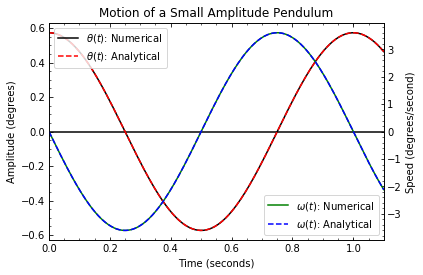

In [14]:
fig = plt.figure()
omega0 = 2.0*np.pi
# For amusement we show how to produce a plot with
# different scales on the left and right axes.
axtheta = fig.add_subplot(111)
axomega = axtheta.twinx()
axtheta.axhline(0, color='k')
axtheta.plot(sol.t, np.rad2deg(sol.y[0]), 'k-', label=r'$\theta(t)$: Numerical')
axtheta.plot(sol.t, np.rad2deg(y0[0]*np.cos(omega0*sol.t)), 'r--',
             label=r'$\theta(t)$: Analytical')
axomega.plot(sol.t, np.rad2deg(sol.y[1]), 'g-', label=r'$\omega(t)$: Numerical')
axomega.plot(sol.t, np.rad2deg(-y0[0]*omega0*np.sin(omega0*sol.t)), 'b--',
             label=r'$\omega(t)$: Analytical')
axtheta.legend(loc='upper left')
axomega.legend(loc='lower right')
axtheta.set_xlabel('Time (seconds)')
axtheta.set_ylabel('Amplitude (degrees)')
axomega.set_ylabel('Speed (degrees/second)')
axtheta.set_title('Motion of a Small Amplitude Pendulum')
axtheta.set_xlim(0, 1.1);

### Larger Amplitude Test

Since the small amplitude test was successful, we can now try it for a larger amplitude.  Here we use $\theta(0)=1$ and make a quick plot of the amplitude as compared to the the amplitude from the small amplitude approximation.

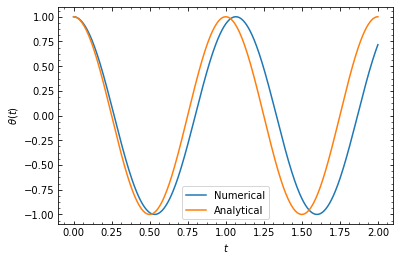

In [15]:
y0 = np.array([1., 0])
sol = integ.solve_ivp(pendulum_eom, (0, 2), y0,
                      vectorized=True, atol=1e-12, rtol=1e-12)
plt.plot(sol.t, sol.y[0], label='Numerical')
plt.plot(sol.t, y0[0]*np.cos(2.0*np.pi*sol.t), label='Analytical')
plt.xlabel('$t$')
plt.ylabel(r'$\theta(t)$')
plt.legend();

## DIY example

Generate and plot a solution to the set of equations

$$
\frac{dy_0}{dt} = y_0 y_1 \\
\frac{dy_1}{dt} = -y_0^2
$$

Integrate this from $t=0$ to $t=3$, using initial conditions $y_0(0) = 1.0$ and $y_1(0) = 2.0$.

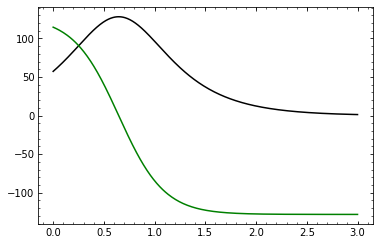

In [16]:
def my_eom (t, y) :
    dydt = np.zeros_like(y)
    dydt[0] = y[0]*y[1]
    dydt[1] = -y[0]**2
    return dydt

y0 = np.array([1.0, 2.0])
sol = integ.solve_ivp(my_eom, (0, 3.0), y0,
                      vectorized=True, atol=1e-12, rtol=1e-12)

# This is a quick plot version of the example.
plt.plot(sol.t, np.rad2deg(sol.y[0]), 'k-')
plt.plot(sol.t, np.rad2deg(sol.y[1]), 'g-')